In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 25.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5034ea200856d0725c40892cdeaf0feeaba8904de3f7d7489c8970abd9625c6e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


KN Regressor, perch-data <br />
<font size="2px">농어의 데이터를 가지고 3개의 이웃한 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

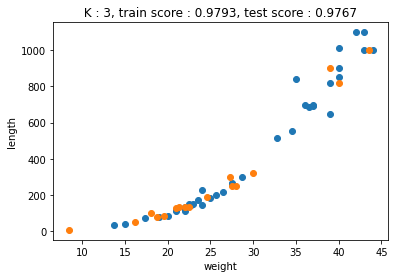

In [4]:
# KN Regressor
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.3, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

plt.ylabel("length")
plt.xlabel("weight")
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.title(f' K : {knr.n_neighbors}, train score : {knr.score(train_input, train_target):.4f}, test score : {knr.score(test_input, test_target):.4f} ')
plt.show()

KN Regressor, wave-data <br />
<font size="2px">wave 데이터를 가지고 3개의 이웃한 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

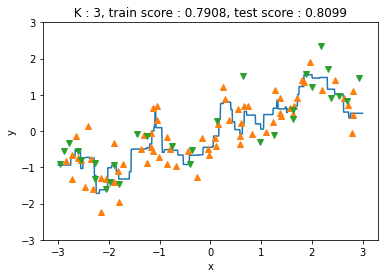

In [5]:
knr = KNeighborsRegressor(n_neighbors=3)
x, y = mglearn.datasets.make_wave(n_samples=100)
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr.fit(train_input, train_target)
xs = np.linspace(-3, 3, 1000)
plt.ylim(-3, 3)
plt.plot(xs, knr.predict(xs.reshape(-1,1)))
plt.plot(train_input, train_target, '^')
plt.plot(test_input, test_target, 'v')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f' K : {knr.n_neighbors}, train score : {knr.score(train_input, train_target):.4f}, test score : {knr.score(test_input, test_target):.4f} ')
plt.show()

LinearRegressor, perch-data <br />
<font size="2px">농어 데이터를 가지고 선형회귀를 통해 직선을 그리고, 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

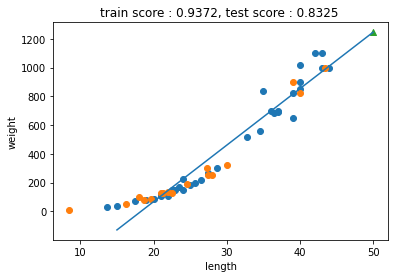

In [10]:
# LinearRegression
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.3, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

lr = LinearRegression()
lr.fit(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1245, marker = "^")
plt.title(f'train score : {lr.score(train_input, train_target):.4f}, test score : {lr.score(test_input, test_target):.4f} ')
plt.show()

LinearRegressor, wave-data <br />
<font size="2px">wave 데이터를 가지고 선형회귀를 통해 직선을 그리고, 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

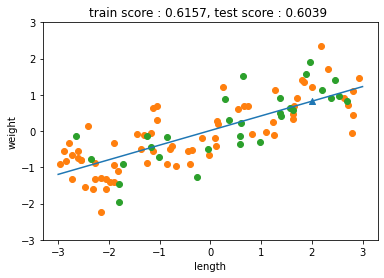

In [7]:
# LinearRegression
x, y = mglearn.datasets.make_wave(n_samples=100)
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, random_state=0)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

lr = LinearRegression()
lr.fit(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.ylim(-3, 3)
plt.plot([-3,3], [-3 * lr.coef_ + lr.intercept_, 3 * lr.coef_ + lr.intercept_])
plt.scatter(2.0, 0.82, marker='^')
plt.title(f'train score : {lr.score(train_input, train_target):.4f}, test score : {lr.score(test_input, test_target):.4f} ')
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.show()

PolynomialRegression, perch-data <br />
<font size="2px">농어 데이터를 가지고 다항회귀를 통해 직선을 이어서 곡선처럼 산점도에 그려 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

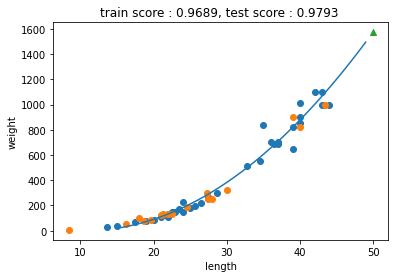

In [9]:
# PolynomialRegression
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.3, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
point = np.arange(15,50)

lr = LinearRegression()
lr.fit(train_poly, train_target)

plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.scatter([50], [1573], marker = "^")
plt.title(f'train score : {lr.score(train_poly, train_target):.4f}, test score : {lr.score(test_poly, test_target):.4f} ')
plt.show()

PolynomialRegression, wave-data <br />
<font size="2px">wave 데이터를 가지고 다항회귀를 통해 직선을 이어서 곡선처럼 산점도에 그려 물체의 길이를 통해 무게를 예측한다, <br />
훈련 사이즈는 0.7, 테스트 사이즈는 0.3으로 설정을 하였다.</font>

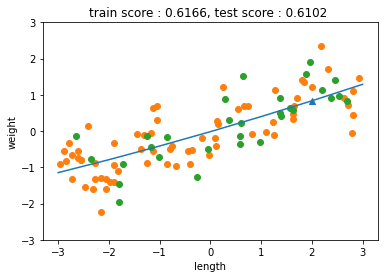

In [ ]:
# PolynomialRegression
x, y = mglearn.datasets.make_wave(n_samples=100)
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, random_state=0)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
point = np.arange(-3, 4)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

plt.xlabel("length")
plt.ylabel("weight")
plt.ylim(-3, 3)
plt.scatter([2], [0.83], marker='^')
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.title(f'train score : {lr.score(train_poly, train_target):.4f}, test score : {lr.score(test_poly, test_target):.4f} ')
plt.show()

<font size="2px">**어느 회귀 모델이 최고인가? 각자 결론을 내리고 이유를 적으시오** <font> <br />
<font size="2px"> 학습하며 느낀 개인적인 생각으로는, **데이터의 분포도에 따라 상황에 맞는 모델 적용을 해야한다고 생각한다, 위에서 구현한 wave 데이터에서는 KNR 모델을, 농어 데이터와 같은 데이터에는 다항회귀 알고리즘이 적합하다고 생각한다.** 이를테면 농어 데이터의 경우, 길이가 증가함에 따라 무게도 같이 증가하는 양상을 볼 수 있다. 그래서 KNR 모델의  예측보다는 선형회귀와 동시에,  다항회귀로 모델을 복잡하게 만들고 접근하는 방법이 더 예측 값이 잘 나오는 것 같다는 결론을 내렸다. 반면, wave 데이터와 같이 데이터 분포가 다양한 양상으로 띄게되는 부분은 선형회귀와 다항회귀에서 차수를 늘림에도 불구하고 KNR 모델보다 낮은 score의 값을 가질 수 있다는 것을 알 수 있었다. <br /> (KNR 모델을 사용하게 되면 적합한 BEST K를 찾는다)